In [1]:
#Build a simple neural network with Keras/TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the dataset (MNIST)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28 * 28).astype('float32') / 255.0  # Flatten and normalize
X_test = X_test.reshape(-1, 28 * 28).astype('float32') / 255.0

# Build the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(28 * 28,)),  # Input layer (784 features for 28x28 images)
    layers.Dense(32, activation='relu'),                         # Hidden layer
    layers.Dense(10, activation='softmax')                       # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8543 - loss: 0.4916
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9604 - loss: 0.1316
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9705 - loss: 0.0950
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9779 - loss: 0.0717
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9816 - loss: 0.0599
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.1008
Test Loss: 0.08832288533449173, Test Accuracy: 0.9739999771118164


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.9026 - loss: 0.3270 - val_accuracy: 0.9831 - val_loss: 0.0519
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.9847 - loss: 0.0496 - val_accuracy: 0.9869 - val_loss: 0.0386
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9898 - loss: 0.0326 - val_accuracy: 0.9887 - val_loss: 0.0348
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9873 - val_loss: 0.0413
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9951 - loss: 0.0156 - val_accuracy: 0.9921 - val_loss: 0.0273
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9897 - loss: 0.0352
Test Loss: 0.027260037139058113, Test Accuracy: 0.9921000003814697


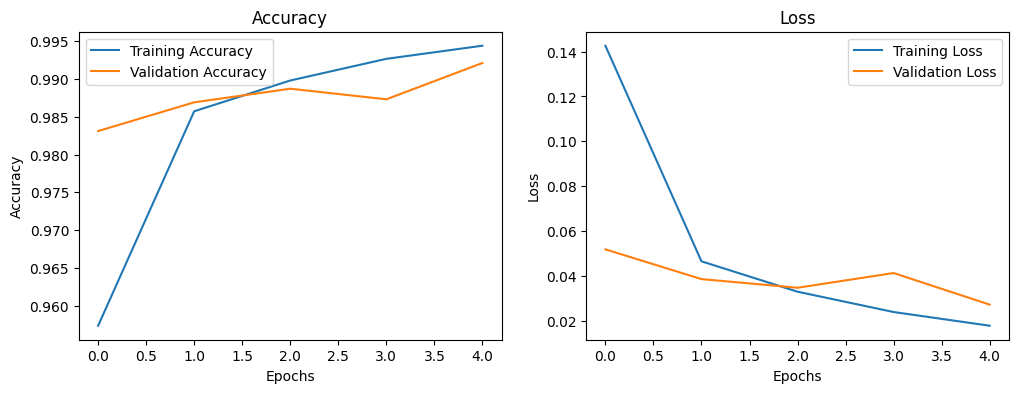

In [2]:
#Build a Convolutional Neural Network with Keras/TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the dataset (MNIST)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Add channel dimension and normalize
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Conv layer
    layers.MaxPooling2D((2, 2)),                                           # MaxPooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),                          # Another Conv layer
    layers.MaxPooling2D((2, 2)),                                           # Another MaxPooling layer
    layers.Flatten(),                                                      # Flatten for Dense layers
    layers.Dense(64, activation='relu'),                                   # Fully connected layer
    layers.Dense(10, activation='softmax')                                 # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.9134 - loss: 0.2858 - val_accuracy: 0.9871 - val_loss: 0.0421
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9846 - loss: 0.0474 - val_accuracy: 0.9892 - val_loss: 0.0334
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9911 - loss: 0.0274 - val_accuracy: 0.9898 - val_loss: 0.0305
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9936 - loss: 0.0203 - val_accuracy: 0.9908 - val_loss: 0.0294
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9956 - loss: 0.0144 - val_accuracy: 0.9871 - val_loss: 0.0413
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9842 - loss: 0.0503
Test Loss: 0.04127580672502518, Test Accuracy: 0.9871000051498413


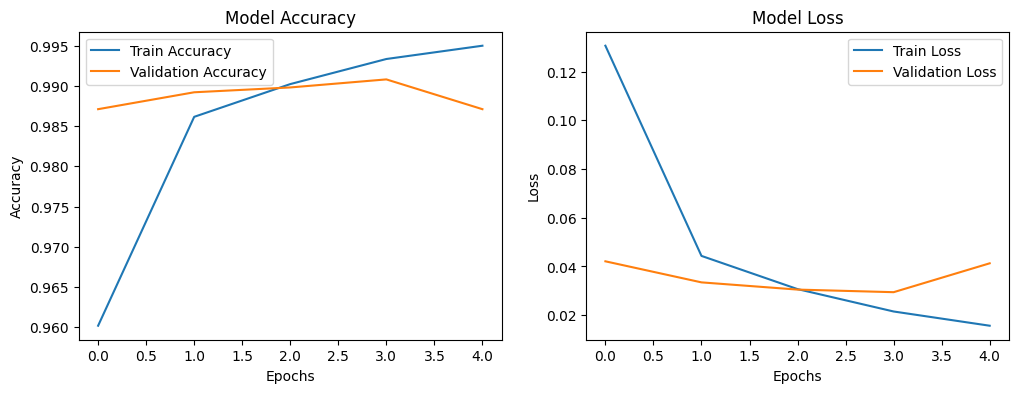

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


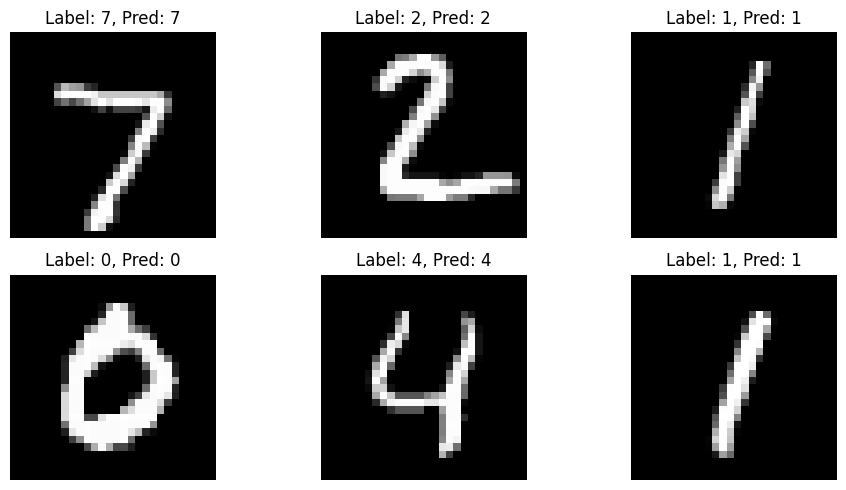

In [3]:
#Create a neural network to recognize handwritten digits using MNIST dataset
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the dataset (MNIST)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Normalize and add channel dimension
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Conv layer
    layers.MaxPooling2D((2, 2)),                                           # MaxPooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),                          # Another Conv layer
    layers.MaxPooling2D((2, 2)),                                           # Another MaxPooling layer
    layers.Flatten(),                                                      # Flatten for Dense layers
    layers.Dense(128, activation='relu'),                                  # Fully connected layer
    layers.Dense(10, activation='softmax')                                 # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Visualize training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# Make predictions on test data
predictions = model.predict(X_test)

# Display a few test samples with predictions
import numpy as np
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_test[i]}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 59s 144ms/step - accuracy: 0.6085 - loss: 0.6433 - val_accuracy: 0.7290 - val_loss: 0.5352
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 142ms/step - accuracy: 0.8166 - loss: 0.4248 - val_accuracy: 0.7211 - val_loss: 0.5258
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 92s 168ms/step - accuracy: 0.8515 - loss: 0.3475 - val_accuracy: 0.7171 - val_loss: 0.5475
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 142ms/step - accuracy: 0.7873 - loss: 69.9541 - val_accuracy: 0.6128 - val_loss: 0.6356
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - accuracy: 0.7129 - loss: 0.5414 - val_accuracy: 0.6558 - val_loss: 0.6178
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.6550 - loss: 0.6288
Test Loss: 0.6178467869758606, Test Accuracy: 0.6557599902153015


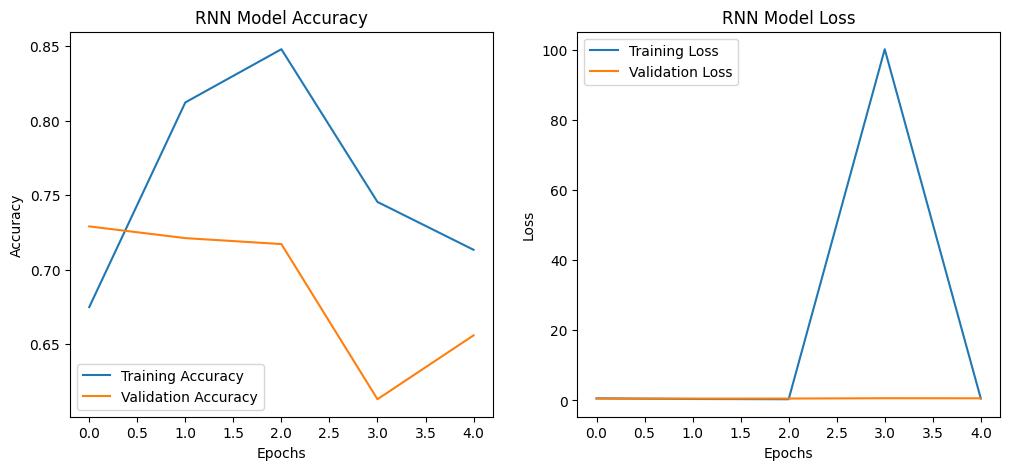

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Review: of two men ? murders in exchange for getting rid of the two people messing up their lives throw ? from the train is an original and very inventive comedy take on the idea it's a credit to danny ? that he both wrote and starred in this minor comedy gem br br anne ? is the mother who ? the film's title and it's understandable why she gets under the skin of danny ? with her sharp tongue and relentlessly putting him down for any minor ? billy crystal is the writer who's wife has stolen his book idea and is now being ? as a great new author even appearing on the oprah show to in ? he should be enjoying thus ? gets the idea of ? murders to rid themselves of these ? factors br br of course everything and anything can happen when writer carl ? lets his imagination ? with ? ideas for how the plot develops and it's amusing all the way through providing plenty of laughs and chuckles along the way as we

In [1]:
#Build RNN with Keras//TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the IMDB dataset
num_words = 10000  # Limit the vocabulary size
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Pad the sequences to ensure they are all the same length
max_len = 200
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

# Build the RNN model
model = models.Sequential([
    layers.Embedding(num_words, 128, input_length=max_len),  # Embedding layer
    layers.SimpleRNN(128, activation='relu', return_sequences=False),  # RNN layer
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Predicting sentiment of a sample review
example_review = X_test[10]  # Select a review (change index to check others)
example_review_text = imdb.get_word_index()  # Convert indices back to words (mapping index -> word)

# Convert the review back to words (for visualization)
reverse_word_index = {value: key for (key, value) in example_review_text.items()}
decoded_review = " ".join([reverse_word_index.get(i - 3, '?') for i in example_review])

# Predict the sentiment
predicted_sentiment = model.predict(np.array([example_review]))  # Predict sentiment of this review

print(f"Review: {decoded_review}")
print(f"Predicted Sentiment: {'Positive' if predicted_sentiment > 0.5 else 'Negative'}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 302ms/step - loss: 0.2403 - val_loss: 0.0939
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 189s 274ms/step - loss: 0.0915 - val_loss: 0.0828
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 275ms/step - loss: 0.0823 - val_loss: 0.0789
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 131s 280ms/step - loss: 0.0790 - val_loss: 0.0765
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 276ms/step - loss: 0.0771 - val_loss: 0.0753
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 277ms/step - loss: 0.0757 - val_loss: 0.0747
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 279ms/step - loss: 0.0749 - val_loss: 0.0749
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 129s 275ms/step - loss: 0.0743 - val_loss: 0.0734
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 279ms/step - loss: 0.0737 - val_loss: 0.0729
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 277ms/step - loss: 0.0733 - val_loss: 0.0727
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


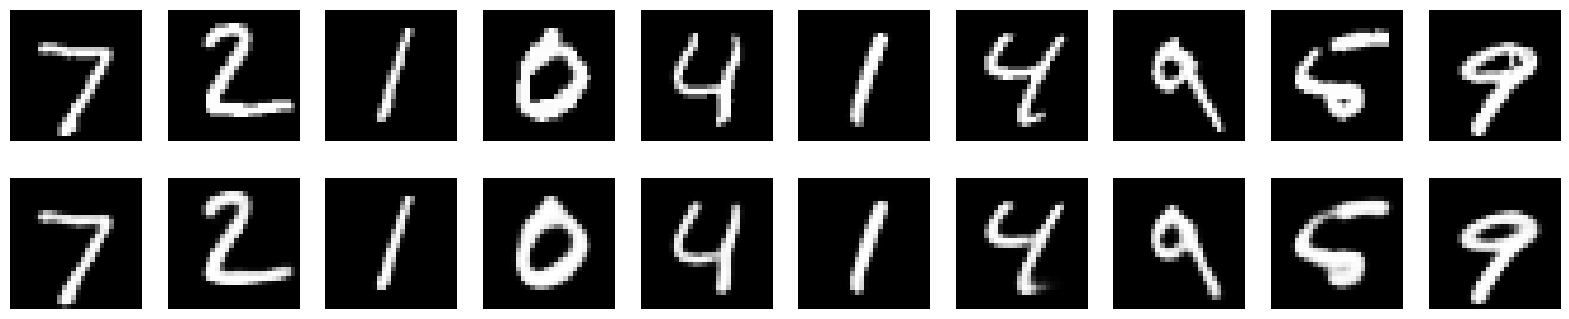

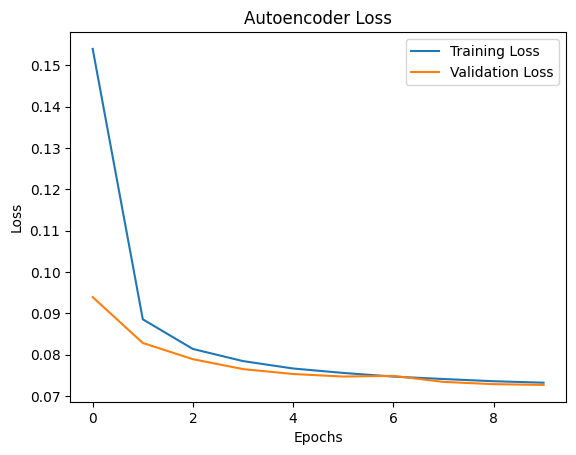

In [4]:
#Build autoencoders with Keras/TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize the images to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to be in the shape (batch_size, 28, 28, 1) for grayscale images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Step 2: Build the Autoencoder model

# Encoder
encoder = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu')  # Latent space representation
])

# Decoder
decoder = models.Sequential([
    layers.Input(shape=(64,)),
    layers.Dense(7 * 7 * 64, activation='relu'),
    layers.Reshape((7, 7, 64)),
    layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')  # Reconstruct the original image
])

# Combine encoder and decoder into a complete autoencoder
autoencoder_input = layers.Input(shape=(28, 28, 1))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = models.Model(autoencoder_input, decoded)

# Step 3: Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=(X_test, X_test))

# Step 4: Visualize the results
# Reconstruct the test images
decoded_images = autoencoder.predict(X_test)

# Plot the original vs. reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#Perform object detection with YOLO3
import cv2
import numpy as np

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Initialize video capture (use your video path or 0 for webcam)
cap = cv2.VideoCapture(0)  # Change to your video path if necessary

while True:
    # Read frame from the video stream
    ret, frame = cap.read()

    if not ret:
        break

    # Prepare the image for YOLO
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Process each object detected
    class_ids = []
    confidences = []
    boxes = []
    height, width, channels = frame.shape

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:  # Confidence threshold
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangular box coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-maximum Suppression (NMS) to eliminate redundant boxes
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw the results
    for i in range(len(boxes)):
        if i in indices:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]
            color = (0, 255, 0)
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, f"{label} {round(confidence, 2)}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Display the frame with detections
    cv2.imshow("YOLO Object Detection", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()
cv2.destroyAllWindows()



In [ ]:
#Build GAN with Keras/TensorFlow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, _), (_, _) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Scale to [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)

# Build the Generator model
def build_generator():
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=100))  # 100-dimensional noise vector
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(np.prod(x_train.shape[1:]), activation='tanh'))  # Reshape to 28x28x1
    model.add(layers.Reshape(x_train.shape[1:]))
    model.summary()
    return model

# Build the Discriminator model
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=x_train.shape[1:]))  # Flatten the image input
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output a probability of being real or fake
    model.summary()
    return model

# Build the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator's weights when training the generator
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)  # Stack the discriminator on top of the generator
    model.summary()
    return model

# Compile the models
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

generator = build_generator()
gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training the GAN
def train_gan(epochs, batch_size, save_interval):
    # Adversarial ground truths
    valid = np.ones((batch_size, 1))  # Labels for real images
    fake = np.zeros((batch_size, 1))  # Labels for fake images

    for epoch in range(epochs):
        # Train the Discriminator
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_images = x_train[idx]

        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_images = generator.predict(noise)

        # Train Discriminator on real and fake images
        d_loss_real = discriminator.train_on_batch(real_images, valid)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the Generator (via the GAN model)
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, valid)  # The generator tries to fool the discriminator

        # Print the progress
        if epoch % save_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")
            save_generated_images(epoch)

# Function to save generated images
def save_generated_images(epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Scale images to [0, 1]

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.close()

# Training parameters
epochs = 10000
batch_size = 64
save_interval = 1000

train_gan(epochs, batch_size, save_interval)


In [ ]:
#Visualize and design CNN with transfer learning
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load VGG16 model pre-trained on ImageNet without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers of VGG16 to retain the pre-trained weights
base_model.trainable = False

# Build the complete model by adding custom layers on top of the pre-trained model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Image data generators for augmenting and normalizing the dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load your datasets (adjust paths for your dataset)
train_generator = train_datagen.flow_from_directory(
    'data/train',  # Path to training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    'data/val',  # Path to validation data
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Visualize training history (accuracy and loss curves)
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)
